In [2]:
# Multithreaded Port Scanner

from queue import Queue
import socket
import threading
import time

target = input('Enter the host to be scanned : ')
print ('Starting scan on host: ', target)
queue = Queue()
open_ports = []
startTime = time.time()


def portscan(port):
    try:
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        sock.connect((target, port))
        return True
    except:
        return False

def get_ports(mode):
    if mode == 1:
        for port in range(1, 1024):
            queue.put(port)
    elif mode == 2:
        for port in range(1, 49152):
            queue.put(port)
    elif mode == 3:
        ports = [20, 21, 22, 23, 25, 53, 80, 110, 443]
        for port in ports:
            queue.put(port)
    elif mode == 4:
        ports = input("Enter your ports (seperate by blank):")
        ports = ports.split()
        ports = list(map(int, ports))
        for port in ports:
            queue.put(port)

def worker():
    while not queue.empty():
        port = queue.get()
        if portscan(port):
            print("Port {} is open!".format(port))
            open_ports.append(port)

def run_scanner(threads, mode):

    get_ports(mode)

    thread_list = []

    for t in range(threads):
        thread = threading.Thread(target=worker)
        thread_list.append(thread)

    for thread in thread_list:
        thread.start()

    for thread in thread_list:
        thread.join()

    print("Open ports are:", open_ports)
    


run_scanner(100, 1)


print('Time taken:', time.time() - startTime)

Enter the host to be scanned : 78.157.57.34
Starting scan on host:  78.157.57.34
Port 21 is open!
Port 80 is open!Port 25 is open!
Port 22 is open!

Open ports are: [25, 21, 22, 80]
Time taken: 231.07679438591003


In [12]:
from socket import *
import time
startTime = time.time()

if __name__ == '__main__':
   target = input('Enter the host to be scanned: ')
   t_IP = gethostbyname(target)
   print ('Starting scan on host: ', t_IP)
   ports = [20, 21, 22, 23, 25, 53, 80, 110, 443]
   for i in ports:
      s = socket(AF_INET, SOCK_STREAM)
      
      conn = s.connect_ex((t_IP, i))
      if(conn == 0) :
         print ('Port %d: OPEN' % (i,))
      s.close()
print('Time taken:', time.time() - startTime)

Enter the host to be scanned: google.com
Starting scan on host:  216.58.214.14
Port 80: OPEN
Port 443: OPEN
Time taken: 152.2982006072998


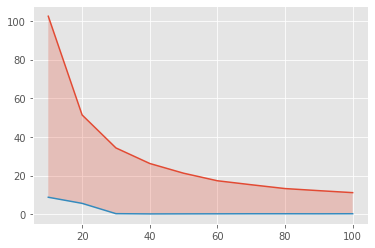

In [21]:
# windows and linux localhost with thread
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
thread=[10,20,30,40,50,60,70,80,90,100]
# windows localhost 
thread_time=[102.42,51.34,34.27,26.22,21.19,17.28,15.22,13.24,12.16,11.13]
# linux localhost
thread_time_2=[8.74,5.58,0.25,0.12,0.15,0.17,0.20,0.20,0.18,0.21]
# windows local host non thread
th_time_nonthread=1021.77
plt.plot(thread,thread_time)
plt.plot(thread,thread_time_2)

plt.fill_between(thread,thread_time,thread_time_2,alpha=0.25)
# point non thread on localhost

plt.show()

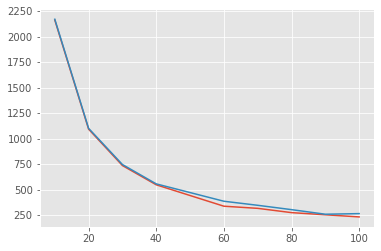

In [17]:
# windows and linux google.com with thread
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
thread=[10,20,30,40,50,60,70,80,90,100]
# windows google.com 
th_time=[2163.50,1092.24,735.25,546.29,441.21,336.27,315.26,273.25,252.2,231.17]
# linux google.com
th_time_2=[2171.01,1100.24,745.36,555.28,470.18,384.98,345.23,302.58,257.60,263.56]


plt.plot(thread,th_time)
plt.plot(thread,th_time_2)
plt.show()

In [17]:
# windows and linux non thread local host 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
# windows localhost 
th_time=1021.77
# linux localhost
thread_time_2=902.45




In [30]:
# windows and linux non thread google.com
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# windows localhost 
th_time=15058.95
# linux localhost
th_time_2=1804.65
